## Plotting Professional Call of Duty Match Information

Homework for Unstructured Data Course  
Neven Grgic  
3/5/2019

In [1]:
import os

import json

import re

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [2]:
#Store the path and names of the maps to use later in plotting
PATH_TO_WW2_MAPS = '../week6/cwl-data/maps/ww2/'

MAP_IMAGES = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png' ,
    'USS Texas': 'uss_texas.png',
    'Valkyrie': 'valkyrie.png'
}

In [3]:
#Make directories for each of the completed maps to be organized into

#first, get the directory names of the data for each event. 
#We will use these names for our map directories also. 
tour_stops = os.listdir('/home/vagrant/work/week7/cwl_data')

#Now make a new directory to save our maps in for each event that took place on the pro tour

newly_created_dirs = []
already_made_dirs = []

for i in range(len(tour_stops)):
    try:
        os.makedirs('/home/vagrant/work/week7/maps/{}'.format(tour_stops[i])) 
        newly_created_dirs.append(tour_stops[i])
    except FileExistsError:
        already_made_dirs.append(tour_stops[i])

print('These directories were created:')
print('')
print("\n".join(newly_created_dirs))
print('These directories already exist:')
print('')
print("\n".join(already_made_dirs))

These directories were created:


These directories already exist:

structured-2018-07-29-proleague2
structured-2018-08-19-champs
structured-2018-04-08-proleague1
structured-2018-04-19-relegation
structured-2018-06-17-anaheim
structured-2018-03-11-atlanta
structured-2018-04-22-seattle
structured-2018-04-01-birmingham
structured-2018-01-14-neworleans


## Define a function to plot all of the COD data in a directory and execute the function

In [4]:
def plot_matches(directory):
    for tour_event in os.listdir('./{}'.format(directory)):
        for a_match in os.listdir('./{}/{}'.format(directory, tour_event)):
            with open('./{}/{}/{}'.format(directory, tour_event, a_match), 'r') as match_file:
            # get match data
                match = json.load(match_file)
                
                death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}

                # get pos data
                events = match['events']
                for evt in events:
                    if evt['type'] == 'spawn':
                        spawn_pos['x'].append( evt['data']['pos']['x'] )
                        spawn_pos['y'].append( evt['data']['pos']['y'] )
                    if evt['type'] == 'death':
                        death_pos['x'].append( evt['data']['pos']['x'] )
                        death_pos['y'].append( evt['data']['pos']['y'] )
            
                # get map image
                if match['map'] in MAP_IMAGES:
                    map_file_name = PATH_TO_WW2_MAPS + MAP_IMAGES[match['map']]
                    map_image = plt.imread(map_file_name)

                    # create figure
                    fig = Figure()
                    FigureCanvas(fig)
                    ax = fig.subplots(1,1)
                    fig.set_figheight(15)
                    fig.set_figwidth(15)
                    # plot map
                    ax.imshow(map_image)
                    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
                    # plot spawns
                    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='cyan')
                    # plot deaths
                    ax.scatter(death_pos['x'], death_pos['y'], color='red')
                    # set title
                    ax.set_title('{} ({})'.format(match['map'], match['mode']))

                    #save the plot 
                    pattern_for_match = r'([a-zA-Z0-9-]+)(\.json)'
                    json_regex = re.compile(pattern_for_match)
                    filename_groups = json_regex.match(a_match).groups()
                    A_MATCH = filename_groups[0]
                    fig.savefig('./maps/{}/{}.png'.format(tour_event, A_MATCH))

In [5]:
plot_matches('cwl_data')

## Take a look a one of our maps to see that it worked

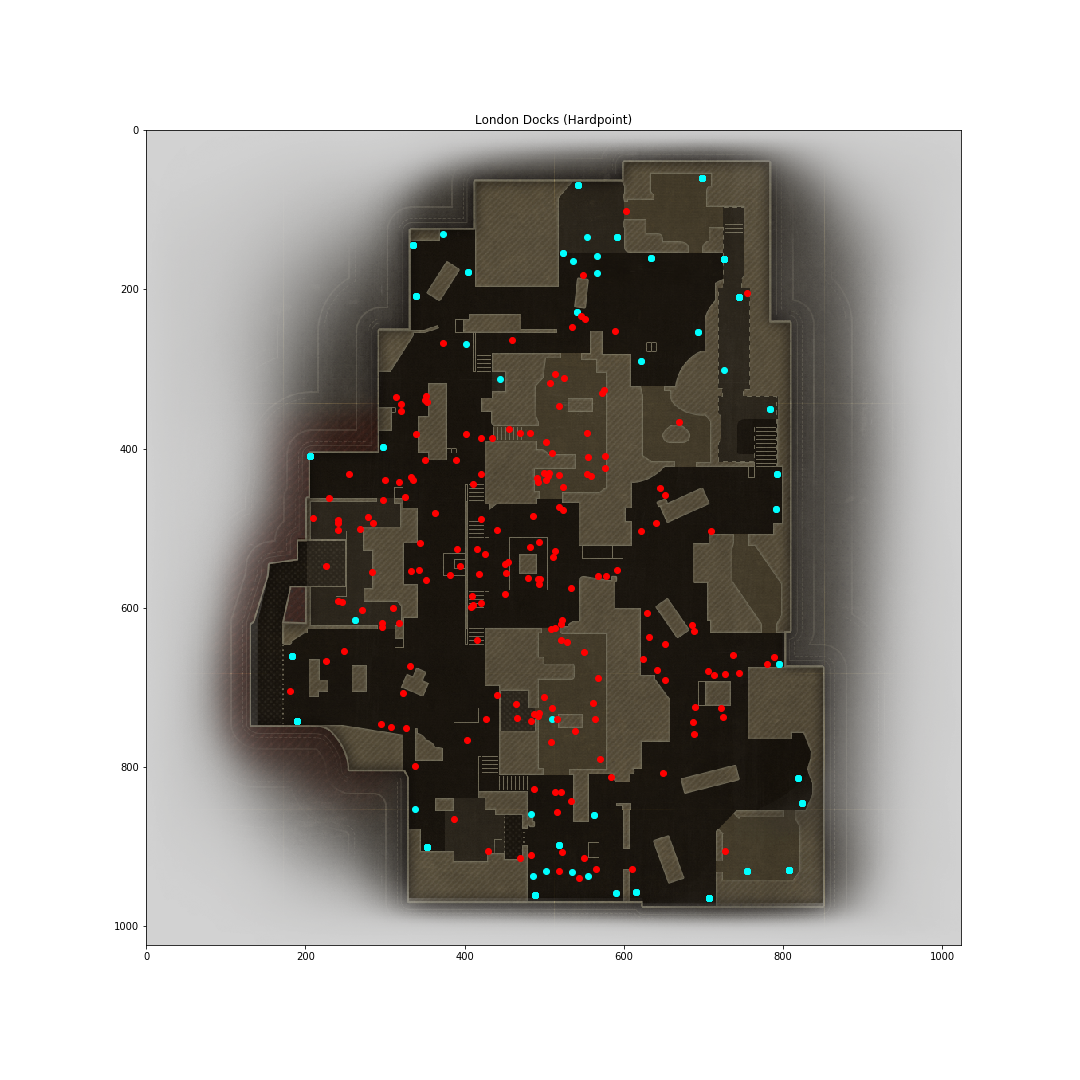

In [6]:
from IPython.display import Image
Image(filename= './maps/structured-2018-01-14-neworleans/structured-1515804441-ec3b07e1-9515-5715-b918-606a0ad816ce.png') 